#  Data-driven explainable XGB-based shear strength prediction
 created by Ji-Gang Xu, Shi-Zhi Chen, Wei-Jie Xu, Zi-Sen Shen

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn.model_selection import train_test_split

data1 = pd.read_excel('TestData.xlsx')
data1.head()

,Specimen NO,fcmax,fcmin,ρ,fy,db,nb,Surface Type,b,h,t-test
0,1,98.8,98.8,0.00370,572.0,9.5,2,S,127.0,304.8,3.65
1,2,83.1,83.1,0.00740,572.0,9.5,4,S,127.0,304.8,5.66
2,3,80.9,80.9,0.00366,572.0,9.5,2,R,127.0,304.8,6.20
3,4,80.9,80.9,0.00740,572.0,9.5,4,R,127.0,304.8,9.43
4,5,86.0,86.0,0.01110,572.0,9.5,6,R,127.0,304.8,12.67


In [2]:
print(data1.shape)

(217, 11)


# Description of Database

In [3]:
data=data1.loc[:, 'fcmax':'t-test']
data.columns

Index(['fcmax', 'fcmin', 'ρ', 'fy', 'db', 'nb', 'Surface Type', 'b', 'h',
       't-test'],
      dtype='object')

In [4]:
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fcmax         217 non-null    float64
 1   fcmin         217 non-null    float64
 2   ρ             217 non-null    float64
 3   fy            217 non-null    float64
 4   db            217 non-null    float64
 5   nb            217 non-null    int64  
 6   Surface Type  217 non-null    object 
 7   b             217 non-null    float64
 8   h             217 non-null    float64
 9   t-test        217 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 17.1+ KB
None


In [5]:
# Description of string values in the surface types

print (data['Surface Type'].unique())
print(data.groupby('Surface Type').size())

['S' 'R']
Surface Type
R    131
S     86
dtype: int64


In [6]:
data.tail()

,fcmax,fcmin,ρ,fy,db,nb,Surface Type,b,h,t-test
212,51.9,50.2,0.00171,564.1,7.0,1,R,150.0,150.0,3.26
213,51.9,50.2,0.00349,420.2,10.0,1,R,150.0,150.0,3.51
214,51.9,50.2,0.00502,440.2,12.0,1,R,150.0,150.0,4.40
215,51.9,50.2,0.00684,383.8,14.0,1,R,150.0,150.0,4.50
216,51.9,50.2,0.00893,375.5,16.0,1,R,150.0,150.0,4.71


In [7]:
# Encoding string values for Surface type

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
data.loc[:,['Surface Type']] = data.loc[:,['Surface Type']].apply(enc.fit_transform)
data.head(15)

,fcmax,fcmin,ρ,fy,db,nb,Surface Type,b,h,t-test
0,98.80,98.80,0.00370,572.0,9.5,2,1,127.0,304.8,3.65
1,83.10,83.10,0.00740,572.0,9.5,4,1,127.0,304.8,5.66
2,80.90,80.90,0.00366,572.0,9.5,2,0,127.0,304.8,6.20
3,80.90,80.90,0.00740,572.0,9.5,4,0,127.0,304.8,9.43
4,86.00,86.00,0.01110,572.0,9.5,6,0,127.0,304.8,12.67
5,86.00,86.00,0.01480,572.0,9.5,8,0,127.0,304.8,15.25
6,89.30,89.30,0.01110,572.0,9.5,6,0,127.0,304.8,13.09
7,89.30,89.30,0.01480,572.0,9.5,8,0,127.0,304.8,14.48
8,101.70,101.70,0.00370,572.0,9.5,2,0,127.0,304.8,10.45
9,101.70,101.70,0.00740,572.0,9.5,4,0,127.0,304.8,11.40


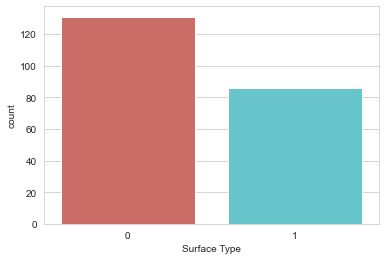

In [8]:
#Lets check wheter data is imbalanced
import seaborn as sns

sns.set_style("whitegrid")
sns.countplot(x='Surface Type',data=data, palette='hls')
plt.show()

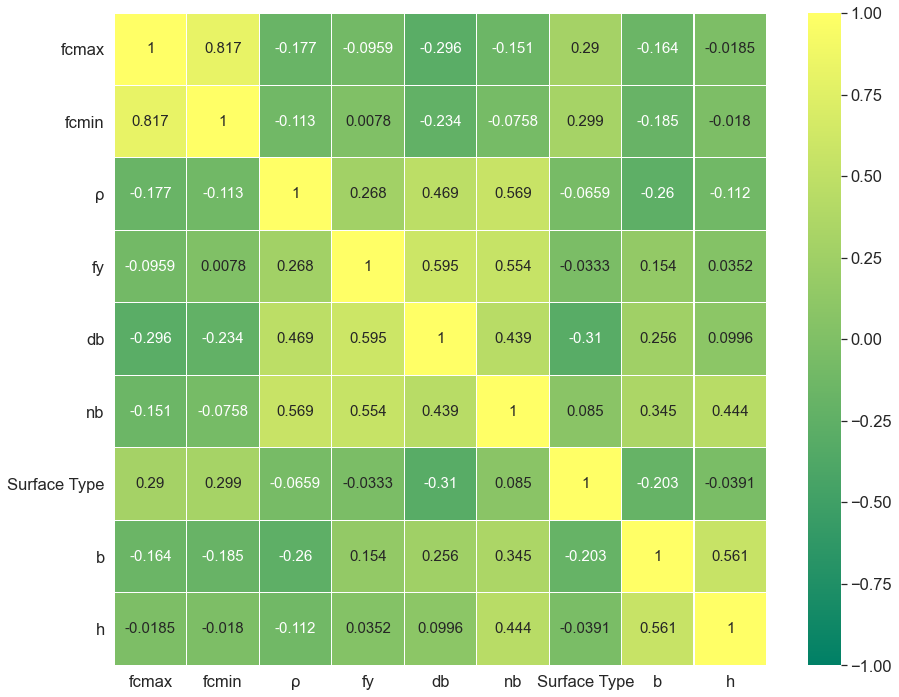

In [9]:
# Examining correlations

corr = data.drop(['t-test'], axis=1).corr()
plt.figure(figsize=(15, 12))
sns.set(font_scale=1.5) 
sns.heatmap(corr[(corr >= 0.0) | (corr <= -0.0)],
            cmap='summer', vmax=1.0, vmin=-1.0, linewidths=0.1, cbar=True, fmt='.3g',
            annot=True, annot_kws={"size": 15}, square=True);

# Define input and output parameters

In [10]:
# Define input parameters
X = data.loc[:, ['fcmax','fcmin','ρ','fy','db','nb','Surface Type','b','h']]

In [11]:
X.head()

,fcmax,fcmin,ρ,fy,db,nb,Surface Type,b,h
0,98.8,98.8,0.00370,572.0,9.5,2,1,127.0,304.8
1,83.1,83.1,0.00740,572.0,9.5,4,1,127.0,304.8
2,80.9,80.9,0.00366,572.0,9.5,2,0,127.0,304.8
3,80.9,80.9,0.00740,572.0,9.5,4,0,127.0,304.8
4,86.0,86.0,0.01110,572.0,9.5,6,0,127.0,304.8


In [12]:
# Define the output
y = data.loc [:, 't-test']

print(y.shape)

(217,)


In [13]:
y.head(15)

0      3.65
1      5.66
2      6.20
3      9.43
4     12.67
5     15.25
6     13.09
7     14.48
8     10.45
9     11.40
10    15.48
11    17.59
12     4.21
13     3.61
14     3.53
Name: t-test, dtype: float64

In [14]:
# Randomly spliting the database into training-testing sets as 70%-30% 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print(y_test)

200     2.41
37      6.85
161     3.93
170     3.92
101     3.61
       ...  
157     7.78
74      4.95
8      10.45
40      4.82
13      3.61
Name: t-test, Length: 66, dtype: float64


In [15]:
# Normalizing the whole data sets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# XGB

In [16]:
import xgboost as xgb
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 

def MAPE(true, pred):
    diff = np.abs(np.array(true) - np.array(pred))
    return np.mean(diff / true)

XGB = xgb.XGBRegressor (n_estimators=100, max_depth=5, learning_rate=0.25, subsample=0.5, gamma=0, random_state=0)
scores = cross_val_score (XGB, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1)
print('10-fold mean RMSE:', np.mean(np.sqrt( -scores)))

XGB.fit(X_train, y_train)

# predicting the results
Z7 = XGB.predict(X_train)
Z8 = XGB.predict(X_test)

print("GBRT Training R2:", r2_score(y_train, Z7), "RMSE:", np.sqrt(mean_squared_error(y_train, Z7)), "MAE:", mean_absolute_error(y_train, Z7),"MAPE:", MAPE(y_train, Z7))
print("GBRT Testing R2:", r2_score(y_test, Z8), "RMSE:", np.sqrt(mean_squared_error(y_test, Z8)), "MAE:", mean_absolute_error(y_test, Z8),"MAPE:", MAPE(y_test, Z8))



10-fold mean RMSE: 0.9070918131365568
GBRT Training R2: 0.9918052508315626 RMSE: 0.24125251295814049 MAE: 0.1334598337261882 MAPE: 0.03682357496328432
GBRT Testing R2: 0.9423785054635453 RMSE: 0.6814536752852075 MAE: 0.47175707894744295 MAPE: 0.16021191044323488


C:\Users\xusj\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


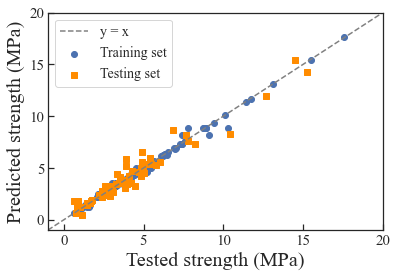

In [17]:
# plotting the scatter for the training and testing sets
xx = np.linspace(-1, 20, 100)
yy = xx
sns.set_style("whitegrid")
sns.set(style="ticks")
plt.figure(figsize=(6,4))
plt.rcParams['font.sans-serif']=['Times New Roman'] 
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(xx, yy, '--',c='grey', linewidth=1.5)
plt.scatter(y_train, Z7,marker='o')
plt.scatter(y_test, Z8,c='darkorange',marker='s')

plt.tick_params (axis='both',labelsize=15)
plt.yticks(fontproperties = 'Times New Roman', size = 15)
plt.xticks(fontproperties = 'Times New Roman', size = 15)

font1 = {'family' : 'Times New Roman', 'weight' : 'normal', 'size' : 20,}
plt.axis('tight')
plt.xlabel('Tested strength (MPa)', font1)
plt.ylabel('Predicted strength (MPa)', font1)
plt.xlim([-1,20])
plt.ylim([-1,20])
plt.legend(['y = x','Training set','Testing set'], loc = 'upper left', prop={'family' : 'Times New Roman', 'weight' : 'normal', 'size' : 14,})
plt.show()

# Explain XGB model

In [18]:
featureName=[r'$f_{cmax}$',r'$f_{cmin}$',r'$\rho$', r'$f_y$',r'$d_b$', r'$n_b$', r'$Sur_{type}$', r'$b$', r'$h$']

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


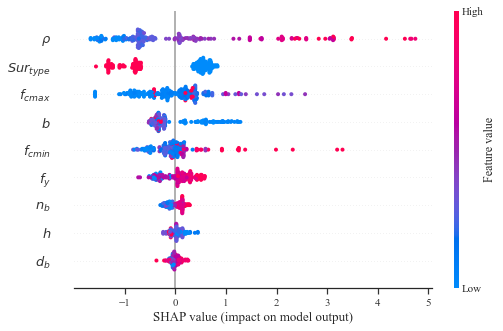

In [19]:
import shap
plt.style.use('seaborn-ticks')
plt.rcParams["font.family"] = "Times New Roman" 
shap.initjs()
X_shap = scaler.transform(X)
X_shap = pd.DataFrame(X_shap, columns = X.columns)
explainer = shap.TreeExplainer(XGB)
shap_values = explainer.shap_values(X_shap)
shap.summary_plot(shap_values, X_shap,feature_names= featureName,show=False)
plt.show()

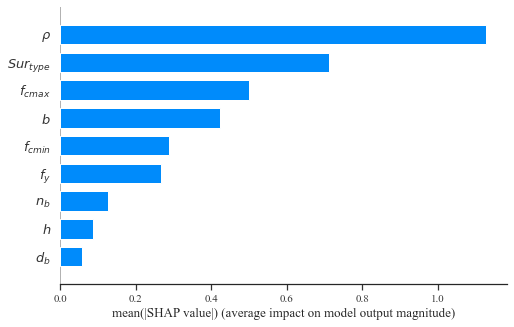

In [20]:
shap.summary_plot(shap_values, X_shap, feature_names=featureName, show=False,plot_type="bar")

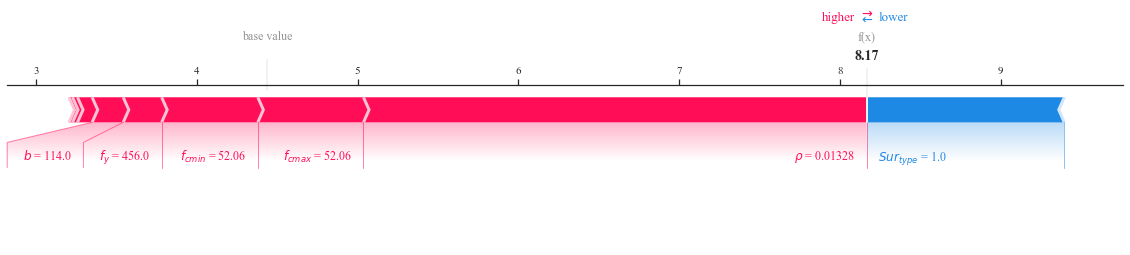

In [21]:
force=shap.force_plot(explainer.expected_value, shap_values[42,:], X.iloc[42,:], feature_names=featureName, matplotlib = True,show=False) 

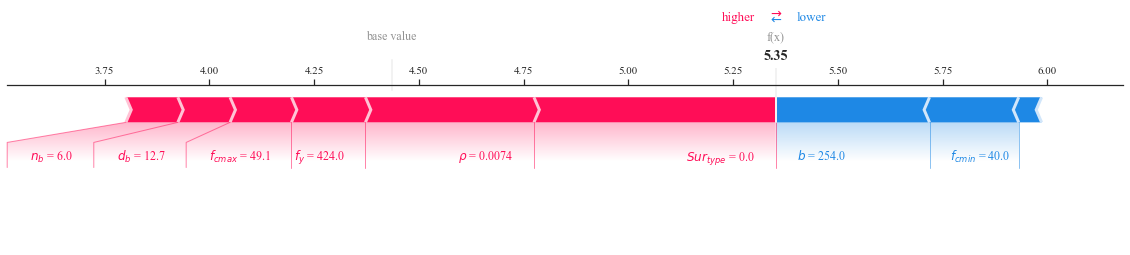

In [22]:
force=shap.force_plot(explainer.expected_value, shap_values[86,:], X.iloc[86,:], feature_names=featureName, matplotlib = True,show=False)

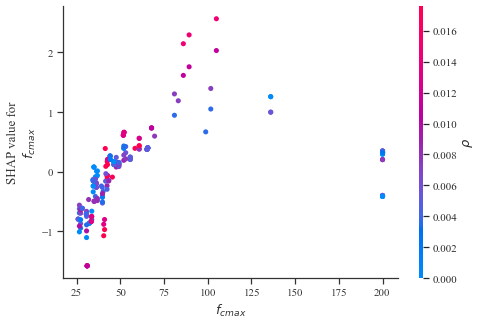

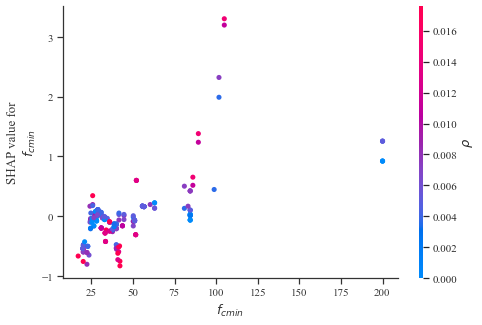

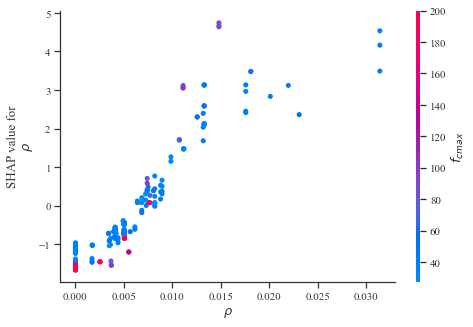

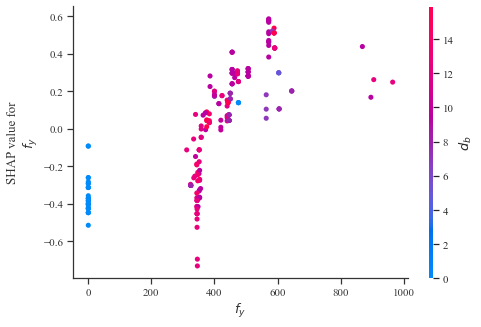

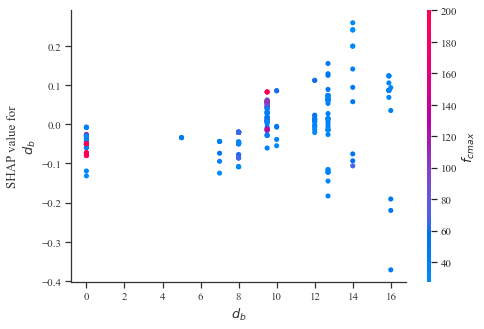

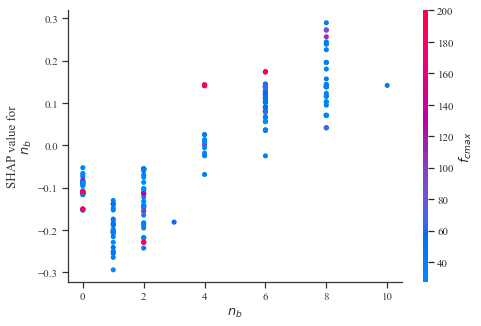

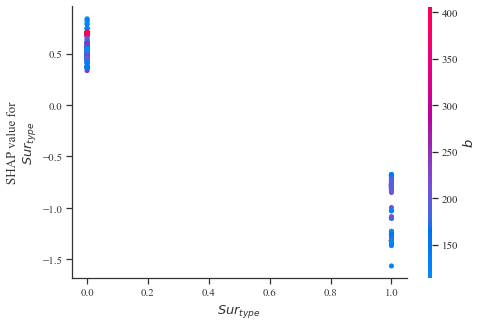

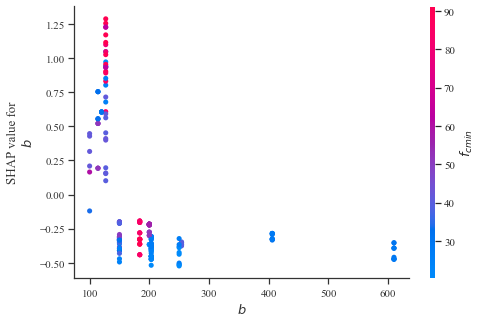

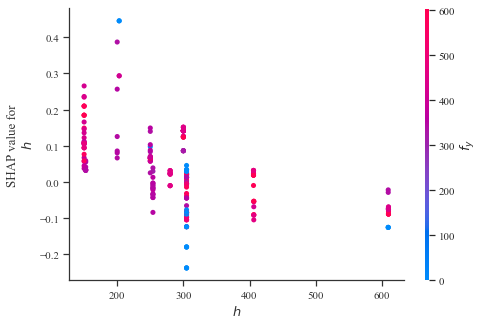

In [24]:
plt.style.use('seaborn-ticks')
plt.rcParams["font.family"] = "Times New Roman" 

length = len(featureName)
n=1
for i in range(length):
    shap.dependence_plot(i, shap_values, X, display_features=X_shap,feature_names=featureName,show=False,dot_size=26 )    
    n=n+1
